In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 

In [105]:
default = pd.read_csv('/content/default of credit card clients.csv')

In [106]:
default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [107]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

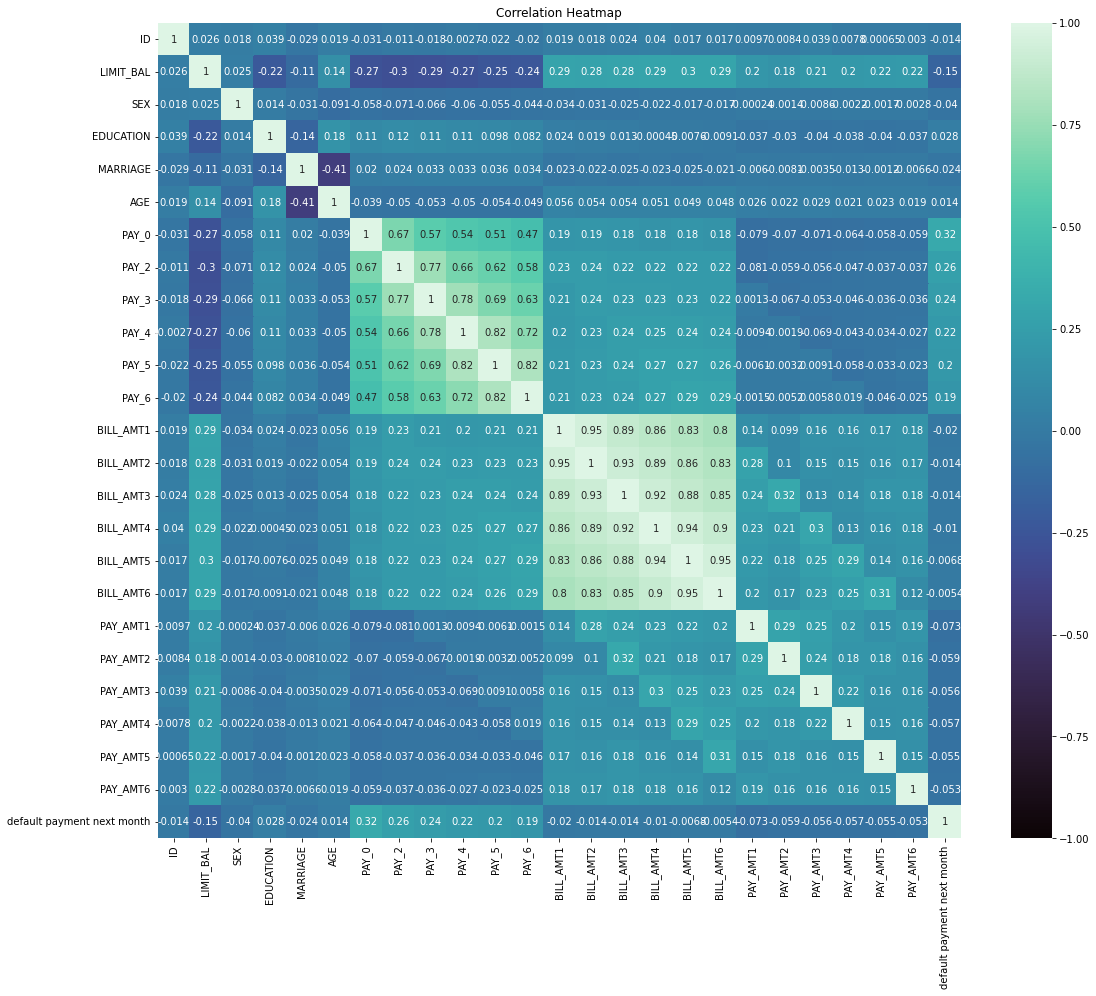

In [108]:
corr = default.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [109]:
default = pd.read_csv('/content/default of credit card clients.csv', index_col="ID")
default.rename(columns=lambda x: x.lower(), inplace=True)
# Base values: female, other_education, not_married
default['grad_school'] = (default['education'] == 1).astype('int')
default['university'] = (default['education'] == 2).astype('int')
default['high_school'] = (default['education'] == 3).astype('int')
default.drop('education', axis=1, inplace=True)

default['male'] = (default['sex']==1).astype('int')
default.drop('sex', axis=1, inplace=True)

default['married'] = (default['marriage'] == 1).astype('int')
default.drop('marriage', axis=1, inplace=True)

# For pay features if the <= 0 then it means it was not delayed
pay_features = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    default.loc[default[p]<=0, p] = 0

default.rename(columns={'default payment next month':'default'}, inplace=True) 
default

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,0,1,0,1,0,0,1
2,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,1,0,0,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,0,1,0,0,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,0,1,0,0,1
5,50000,57,0,0,0,0,0,0,8617,5670,...,10000,9000,689,679,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39,0,0,0,0,0,0,188948,192815,...,5003,3047,5000,1000,0,0,0,1,1,1
29997,150000,43,0,0,0,0,0,0,1683,1828,...,8998,129,0,0,0,0,0,1,1,0
29998,30000,37,4,3,2,0,0,0,3565,3356,...,22000,4200,2000,3100,1,0,1,0,1,0


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [111]:
target_name = 'default'
X = default.drop('default', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = default[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

In [112]:
def CMatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [113]:
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'], 
                      columns=['NULL','LogisticReg', 'ClassTree', 'NaiveBayes'])

In [114]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDICTION,pay,default,Total
TRUE,,,
pay,3505,0,3505
default,995,0,995
Total,4500,0,4500


In [115]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

# 2. Create an instance of the estimator
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)

# 3. Use the trainning data to train the estimator
logistic_regression.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3365,140,3505
default,671,324,995
Total,4036,464,4500


In [116]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeClassifier

# 2. Create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

# 3. Use the trainning data to train the estimator
class_tree.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3185,320,3505
default,634,361,995
Total,3819,681,4500


In [117]:
# 1. Import the estimator object (model)
from sklearn.naive_bayes import GaussianNB

# 2. Create an instance of the estimator
NBC = GaussianNB()

# 3. Use the trainning data to train the estimator
NBC.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,2912,593,3505
default,439,556,995
Total,3351,1149,4500


In [118]:
100*metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,77.888889,81.977778,78.8,77.066667
precision,0.0,69.827586,53.010279,48.389904
recall,0.0,32.562814,36.281407,55.879397


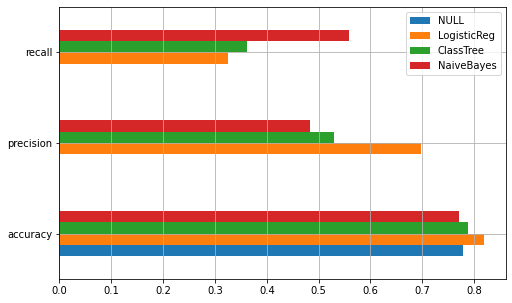

In [119]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [120]:
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test, 
                                                                probas_pred=NBC.predict_proba(X_test)[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test, 
                                                                probas_pred=logistic_regression.predict_proba(X_test)[:,1])

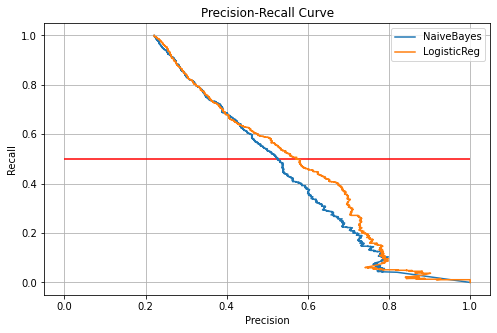

In [121]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(precision_nb, recall_nb, label='NaiveBayes')
ax.plot(precision_lr, recall_lr, label='LogisticReg')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

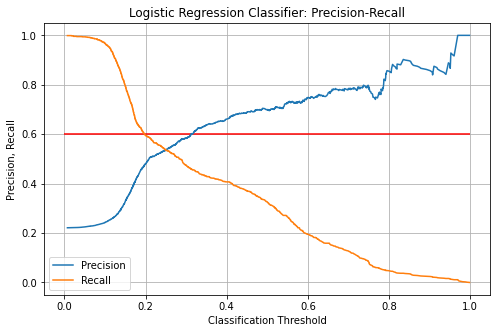

In [122]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr[1:], label='Precision')
ax.plot(thresholds_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

In [123]:
y_pred_proba = logistic_regression.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.2).astype('int')
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("Recall: ", 100*recall_score(y_pred=y_pred_test, y_true=y_test))
print("Precision: ", 100*precision_score(y_pred=y_pred_test, y_true=y_test))
CMatrix(CM)

Recall:  59.497487437185924
Precision:  47.85772029102668


PREDICTION,pay,default,Total
TRUE,,,
pay,2860,645,3505
default,403,592,995
Total,3263,1237,4500


In [124]:
def make_ind_prediction(new_data):
    data = new_data.values.reshape(1, -1)
    data = robust_scaler.transform(data)
    prob = logistic_regression.predict_proba(data)[0][1]
    if prob >= 0.2:
        return 'Will default'
    else:
        return 'Will pay'


In [125]:
from collections import OrderedDict
new_customer = OrderedDict([('limit_bal', 4000),('age', 50 ),('bill_amt1', 500),
                            ('bill_amt2', 35509 ),('bill_amt3', 689 ),('bill_amt4', 0 ),
                            ('bill_amt5', 0 ),('bill_amt6', 0 ), ('pay_amt1', 0 ),('pay_amt2', 35509 ),
                            ('pay_amt3', 0 ),('pay_amt4', 0 ),('pay_amt5', 0 ), ('pay_amt6', 0 ),
                            ('male', 1 ),('grad_school', 0 ),('university', 1 ), ('high_school', 0 ),
                            ('married', 1 ),('pay_0', -1 ),('pay_2', -1 ),('pay_3', -1 ),
                            ('pay_4', 0),('pay_5', -1), ('pay_6', 0)])

new_customer = pd.Series(new_customer)
make_ind_prediction(new_customer)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"


'Will default'

In [126]:
from collections import OrderedDict
new_customer = OrderedDict([('limit_bal', 4000),('age', 50 ),('bill_amt1', 500),
                            ('bill_amt2', 35889 ),('bill_amt3', 689 ),('bill_amt4', 0 ),
                            ('bill_amt5', 0 ),('bill_amt6', 0 ), ('pay_amt1', 0 ),('pay_amt2', 35509 ),
                            ('pay_amt3', 0 ),('pay_amt4', 0 ),('pay_amt5', 0 ), ('pay_amt6', 0 ),
                            ('male', 1 ),('grad_school', 0 ),('university', 1 ), ('high_school', 0 ),
                            ('married', 1 ),('pay_0', -1 ),('pay_2', -1 ),('pay_3', -1 ),
                            ('pay_4', 0),('pay_5', -1), ('pay_6', 2)])

new_customer = pd.Series(new_customer)
make_ind_prediction(new_customer)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"


'Will default'

In [127]:
models = {
    MLPClassifier():      "Neural Network"
  
}

for model in models.keys():
    model.fit(X_train, y_train)
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

Neural Network: 81.40%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn import metrics
from collections import Counter
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import cluster,metrics
import matplotlib.pyplot as plt
import os
import random
import itertools
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import librosa
import scipy
import math
import tensorflow as tf


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [129]:
model = Sequential()
model.add(Dense(8, input_dim = len(X_train[0,:]) , activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 208       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________
None


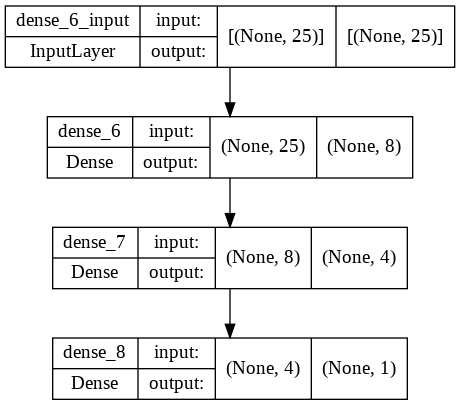

In [130]:
tf.keras.utils.plot_model(model, show_shapes=True,expand_nested=True)

In [131]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_split = .1)

loss, accuracy = model.evaluate(x=X_test,y=y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/100
633/633 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7835 - val_loss: 0.4874 - val_accuracy: 0.8058
Epoch 2/100
633/633 [==============================] - 1s 2ms/step - loss: 0.4643 - accuracy: 0.8052 - val_loss: 0.4452 - val_accuracy: 0.8129
Epoch 3/100
633/633 [==============================] - 1s 2ms/step - loss: 0.4463 - accuracy: 0.8117 - val_loss: 0.4367 - val_accuracy: 0.8200
Epoch 4/100
633/633 [==============================] - 1s 2ms/step - loss: 0.4421 - accuracy: 0.8146 - val_loss: 0.4316 - val_accuracy: 0.8236
Epoch 5/100
633/633 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.8160 - val_loss: 0.4310 - val_accuracy: 0.8244
Epoch 6/100
633/633 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.8166 - val_loss: 0.4305 - val_accuracy: 0.8227
Epoch 7/100
633/633 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.8180 - val_loss: 0.4294 - val_accuracy: 0.8236

Accuracy: 0.8146666666666667
Precision: 0.6524122807017544
Recall: 0.3567146282973621
F1-Score: 0.4612403100775193


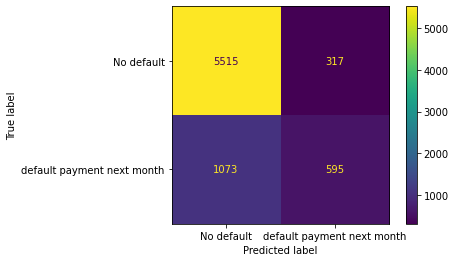

acuracy: 0.8146666666666667
precision: 0.6524122807017544
recall 0.3567146282973621
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5832
           1       0.65      0.36      0.46      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.67      7500
weighted avg       0.80      0.81      0.79      7500



In [132]:

y_pred = (model.predict(X_test)>0.5).astype('int32').flatten()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-Score:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels= ['No default','default payment next month'])
disp.plot()
plt.show()

from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

In [133]:


model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=64, validation_split = .1)

loss, accuracy = model.evaluate(x=X_test,y=y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/100
317/317 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.8224 - val_loss: 0.4252 - val_accuracy: 0.8271
Epoch 2/100
317/317 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8222 - val_loss: 0.4264 - val_accuracy: 0.8267
Epoch 3/100
317/317 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8215 - val_loss: 0.4266 - val_accuracy: 0.8271
Epoch 4/100
317/317 [==============================] - 1s 2ms/step - loss: 0.4242 - accuracy: 0.8222 - val_loss: 0.4262 - val_accuracy: 0.8244
Epoch 5/100
317/317 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8219 - val_loss: 0.4257 - val_accuracy: 0.8244
Epoch 6/100
317/317 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.8218 - val_loss: 0.4263 - val_accuracy: 0.8262
Epoch 7/100
317/317 [==============================] - 1s 2ms/step - loss: 0.4247 - accuracy: 0.8219 - val_loss: 0.4249 - val_accuracy: 0.8267

Accuracy: 0.8138666666666666
Precision: 0.6534988713318285
Recall: 0.3471223021582734
F1-Score: 0.45340642129992176


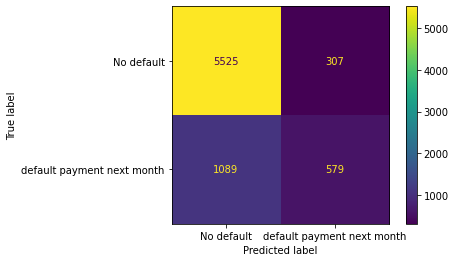

acuracy: 0.8138666666666666
precision: 0.6534988713318285
recall 0.3471223021582734
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5832
           1       0.65      0.35      0.45      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500



In [134]:
y_pred = (model.predict(X_test)>0.5).astype('int32').flatten()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-Score:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels= ['No default','default payment next month'])
disp.plot()
plt.show()

from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))


In [135]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=50, batch_size=16, validation_split = .1)

loss, accuracy = model.evaluate(x=X_test,y=y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/50
1266/1266 [==============================] - 3s 2ms/step - loss: 0.4250 - accuracy: 0.8214 - val_loss: 0.4314 - val_accuracy: 0.8222
Epoch 2/50
1266/1266 [==============================] - 2s 2ms/step - loss: 0.4253 - accuracy: 0.8223 - val_loss: 0.4289 - val_accuracy: 0.8222
Epoch 3/50
1266/1266 [==============================] - 2s 1ms/step - loss: 0.4250 - accuracy: 0.8224 - val_loss: 0.4290 - val_accuracy: 0.8204
Epoch 4/50
1266/1266 [==============================] - 2s 2ms/step - loss: 0.4247 - accuracy: 0.8217 - val_loss: 0.4279 - val_accuracy: 0.8227
Epoch 5/50
1266/1266 [==============================] - 2s 2ms/step - loss: 0.4246 - accuracy: 0.8219 - val_loss: 0.4268 - val_accuracy: 0.8227
Epoch 6/50
1266/1266 [==============================] - 2s 2ms/step - loss: 0.4247 - accuracy: 0.8227 - val_loss: 0.4279 - val_accuracy: 0.8218
Epoch 7/50
1266/1266 [==============================] - 2s 2ms/step - loss: 0.4245 - accuracy: 0.8225 - val_loss: 0.4297 - val_accuracy:

Accuracy: 0.8115555555555556
Precision: 0.6256410256410256
Recall: 0.3678391959798995
F1-Score: 0.46329113924050636


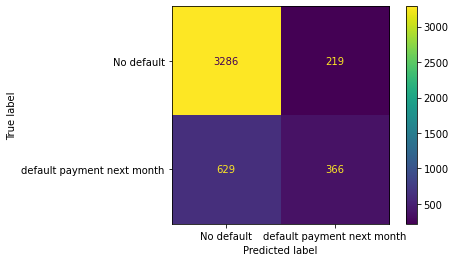

acuracy: 0.8115555555555556
precision: 0.6256410256410256
recall 0.3678391959798995
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3505
           1       0.63      0.37      0.46       995

    accuracy                           0.81      4500
   macro avg       0.73      0.65      0.67      4500
weighted avg       0.79      0.81      0.79      4500



In [150]:
y_pred = (model.predict(X_test)>0.5).astype('int32').flatten()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-Score:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels= ['No default','default payment next month'])
disp.plot()
plt.show()

from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))


In [137]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=128, validation_split = .1)

loss, accuracy = model.evaluate(x=X_test,y=y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/100
159/159 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8233 - val_loss: 0.4272 - val_accuracy: 0.8249
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8233 - val_loss: 0.4269 - val_accuracy: 0.8249
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8233 - val_loss: 0.4277 - val_accuracy: 0.8240
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8226 - val_loss: 0.4273 - val_accuracy: 0.8267
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8229 - val_loss: 0.4270 - val_accuracy: 0.8249
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8231 - val_loss: 0.4269 - val_accuracy: 0.8244
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8229 - val_loss: 0.4274 - val_accuracy: 0.8253

Accuracy: 0.8115555555555556
Precision: 0.6256410256410256
Recall: 0.3678391959798995
F1-Score: 0.46329113924050636


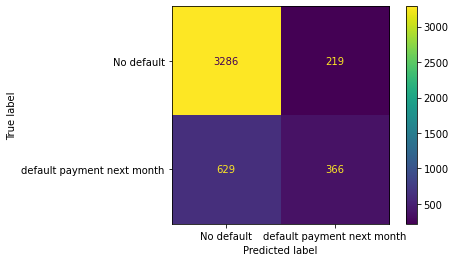

acuracy: 0.8115555555555556
precision: 0.6256410256410256
recall 0.3678391959798995
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3505
           1       0.63      0.37      0.46       995

    accuracy                           0.81      4500
   macro avg       0.73      0.65      0.67      4500
weighted avg       0.79      0.81      0.79      4500



In [149]:
y_pred = (model.predict(X_test)>0.5).astype('int32').flatten()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-Score:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels= ['No default','default payment next month'])
disp.plot()
plt.show()
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))


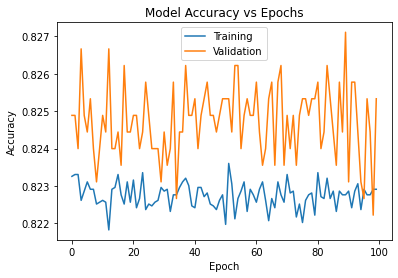

In [139]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')

plt.show()

In [140]:
from sklearn.model_selection import train_test_split
target_name = 'default'
X = default.drop('default', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = default[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

In [141]:
model = Sequential(name="Neural_Network")
model.add(Dense(100, activation = 'relu', name='Hidden_Layer'))
model.add(Dense(1, activation = 'sigmoid',name='Output_Layer'))
model.build((None,25))

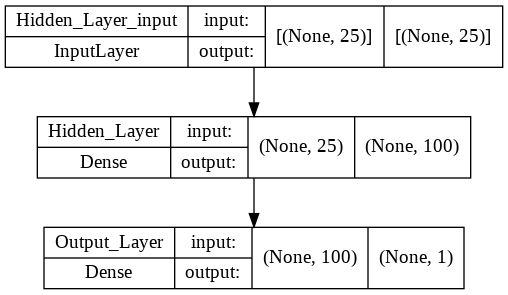

In [142]:
tf.keras.utils.plot_model(model, show_shapes=True,expand_nested=True)

In [143]:
model.summary()

Model: "Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer (Dense)        (None, 100)               2600      
                                                                 
 Output_Layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=50, batch_size=64, validation_split = .1)

loss, accuracy = model.evaluate(x=X_test,y=y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/50
359/359 [==============================] - 2s 3ms/step - loss: 0.4797 - accuracy: 0.8020 - val_loss: 0.4543 - val_accuracy: 0.8149
Epoch 2/50
359/359 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.8172 - val_loss: 0.4494 - val_accuracy: 0.8157
Epoch 3/50
359/359 [==============================] - 1s 3ms/step - loss: 0.4388 - accuracy: 0.8191 - val_loss: 0.4502 - val_accuracy: 0.8169
Epoch 4/50
359/359 [==============================] - 1s 3ms/step - loss: 0.4356 - accuracy: 0.8195 - val_loss: 0.4480 - val_accuracy: 0.8141
Epoch 5/50
359/359 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.8193 - val_loss: 0.4469 - val_accuracy: 0.8137
Epoch 6/50
359/359 [==============================] - 1s 3ms/step - loss: 0.4317 - accuracy: 0.8195 - val_loss: 0.4619 - val_accuracy: 0.8090
Epoch 7/50
359/359 [==============================] - 1s 3ms/step - loss: 0.4328 - accuracy: 0.8203 - val_loss: 0.4453 - val_accuracy: 0.8188
Epoch 

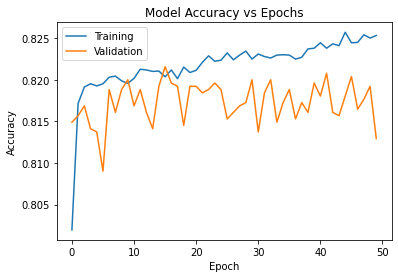

In [145]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')

plt.show()

Accuracy: 0.8115555555555556
Precision: 0.6256410256410256
Recall: 0.3678391959798995
F1-Score: 0.46329113924050636


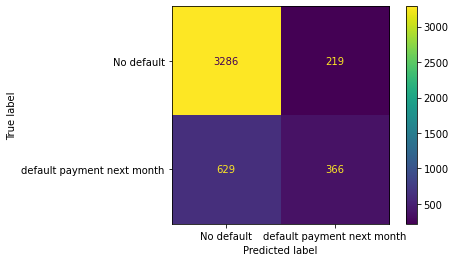

acuracy: 0.8115555555555556
precision: 0.6256410256410256
recall 0.3678391959798995
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3505
           1       0.63      0.37      0.46       995

    accuracy                           0.81      4500
   macro avg       0.73      0.65      0.67      4500
weighted avg       0.79      0.81      0.79      4500



In [147]:
y_pred = (model.predict(X_test)>0.5).astype('int32').flatten()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-Score:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels= ['No default','default payment next month'])
disp.plot()
plt.show()
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))
